##### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn import metrics
import os,sys
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score
from yellowbrick.classifier import ClassificationReport, ROCAUC


##### Read the csv file

In [2]:
df = pd.read_csv("concrete.csv")
df.head((5))

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


#### Exporatory data Analysis

##### Univariate Analysis

In [3]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
df.shape

(1030, 9)

In [6]:
df.isnull().sum().sum()

0

In [7]:
sum(df.duplicated()) #checking for duplicates

25

In [8]:
df[df.duplicated()]
df.drop_duplicates(keep='first', inplace=True)   #drop duplicates

In [9]:
sum(df.duplicated())    # checking if all the dupicates are removed

0

In [10]:
df.std()   #standard deviation

cement          104.344261
slag             86.170807
ash              64.207969
water            21.339334
superplastic      5.919967
coarseagg        77.579667
fineagg          80.340435
age              63.734692
strength         16.284815
dtype: float64

In [11]:
df.skew()   #checking for skewness

cement          0.564959
slag            0.855225
ash             0.497231
water           0.034433
superplastic    0.980604
coarseagg      -0.065256
fineagg        -0.252353
age             3.253974
strength        0.395696
dtype: float64

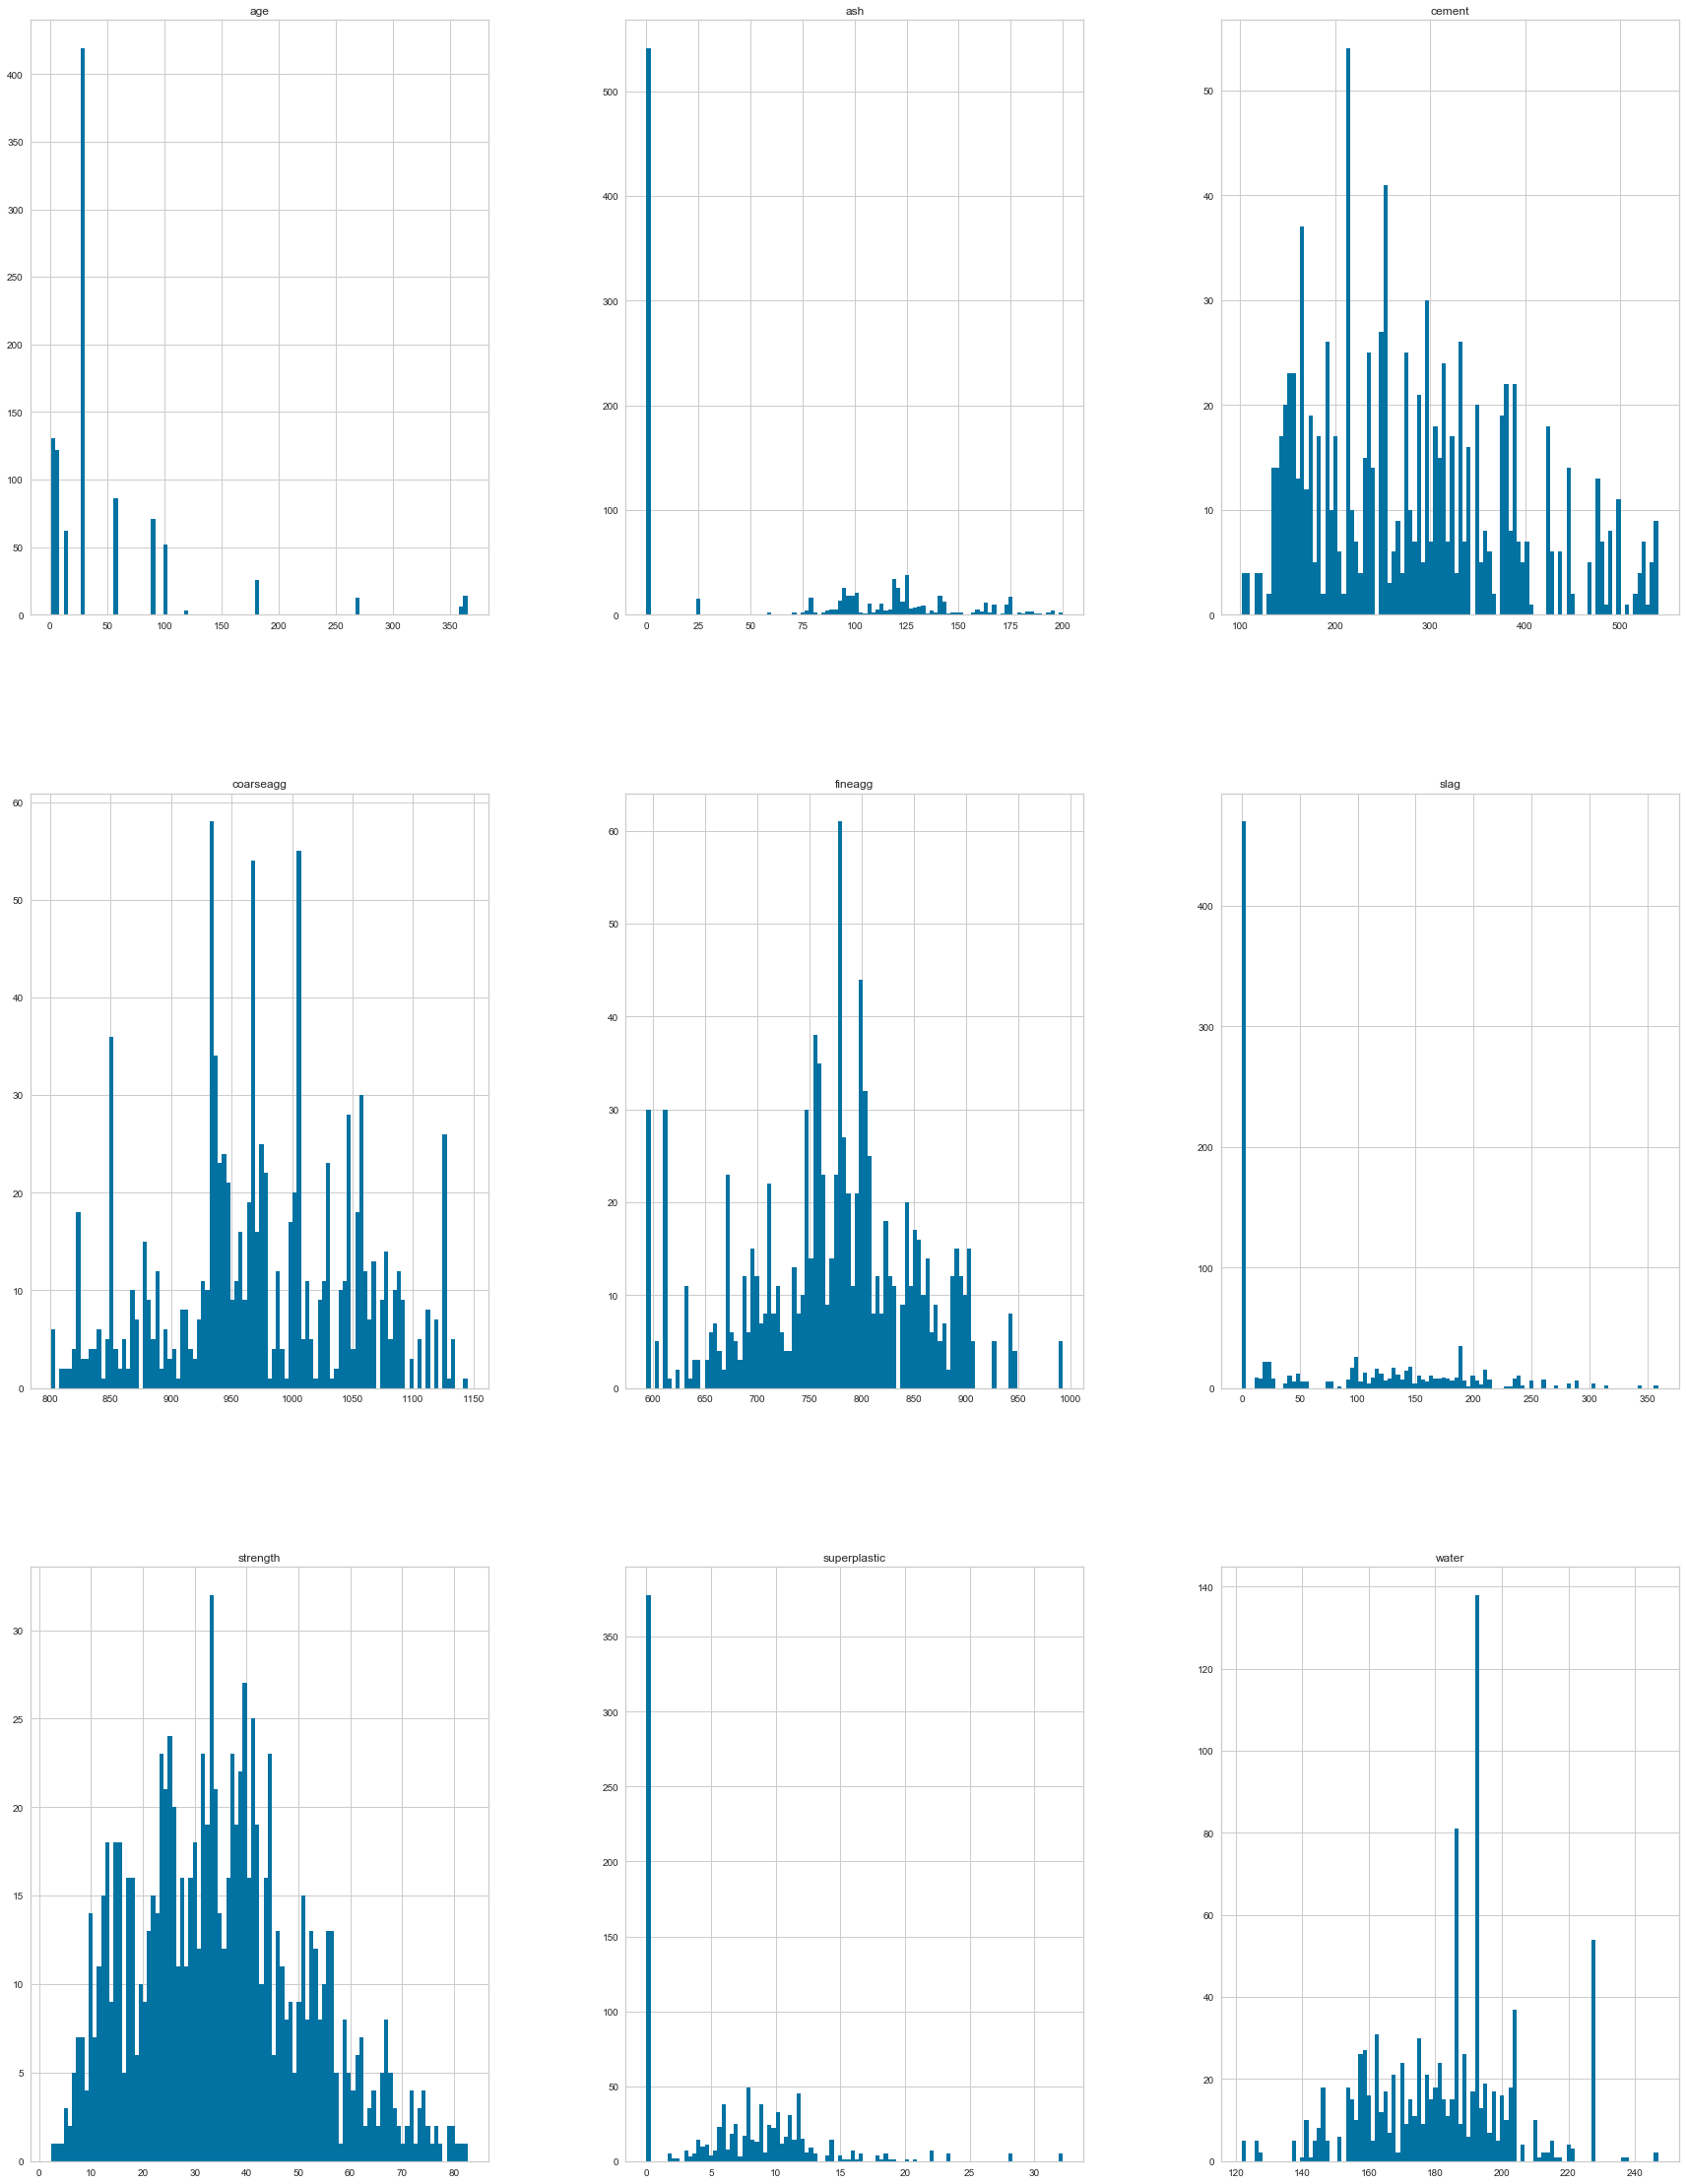

In [12]:
columns = df.columns.tolist()
df[columns].hist(stacked=False, bins=100, figsize=(30,40)); 
# Histogram of each column

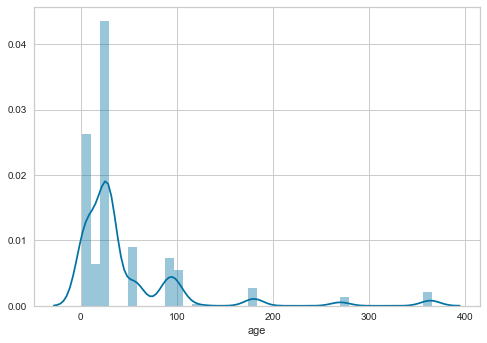

In [13]:
sns.distplot(df['age'])  # we can see most of the concrete has an age in the range of 0-50 days

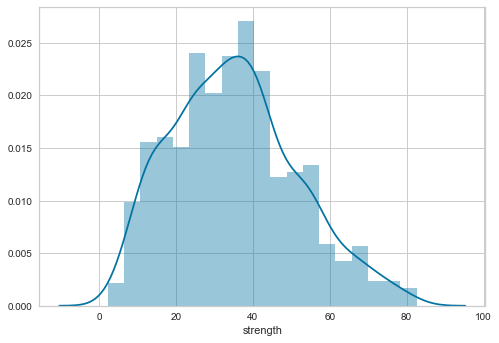

In [14]:
sns.distplot(df['strength']) #strength is mainy in the range 20-45 MPa

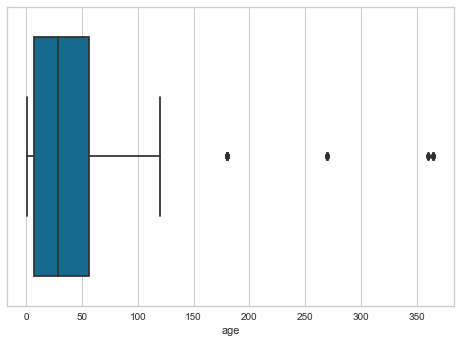

In [15]:
sns.boxplot(df['age'])  # this box plot for age shows us that there are very few outliers

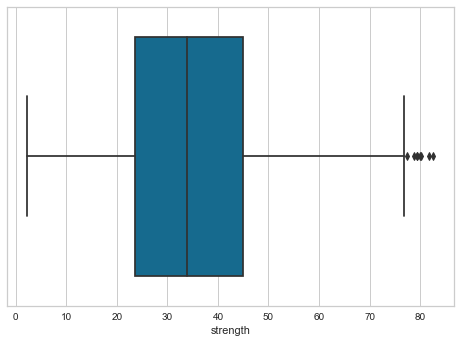

In [16]:
sns.boxplot(df['strength']) 

##### Bivariate Analysis

<Figure size 1080x720 with 0 Axes>

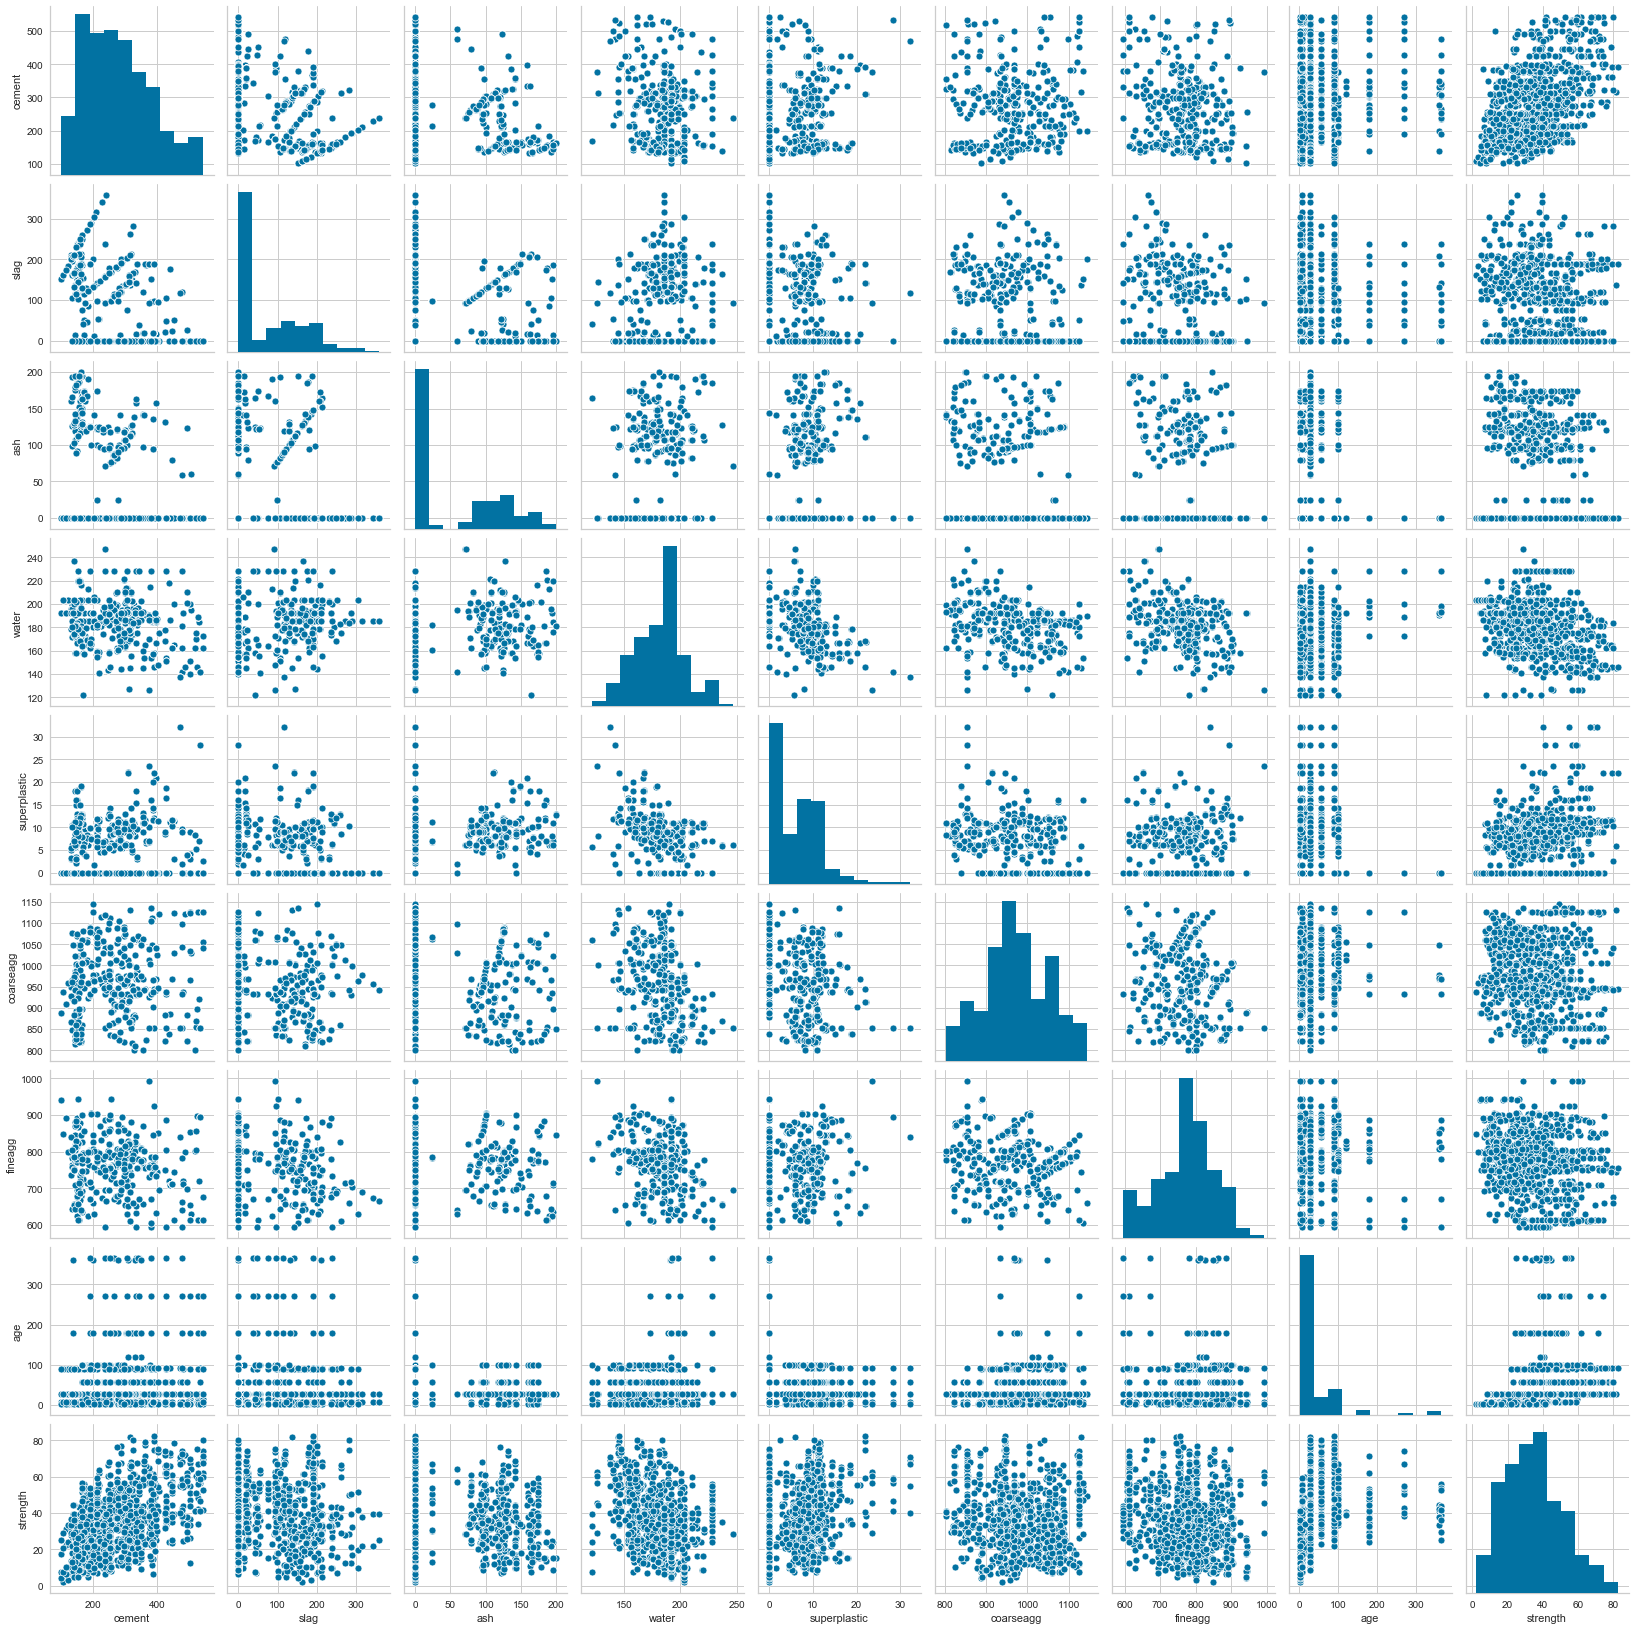

In [17]:
plt.figure(figsize=(15,10))  
sns.pairplot(df)
plt.show()

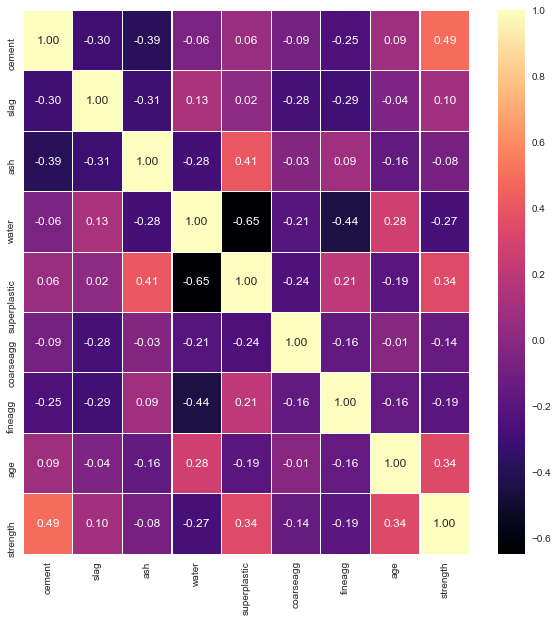

In [18]:
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") 
plt.show()

# below heatmap shows correlation between attributes.

##### From the heatmap above , we can see a high correlation between the strength and the features cement(0.49), superplastic(0.34) and age(0.34). Least correlation is seen between water and strength.

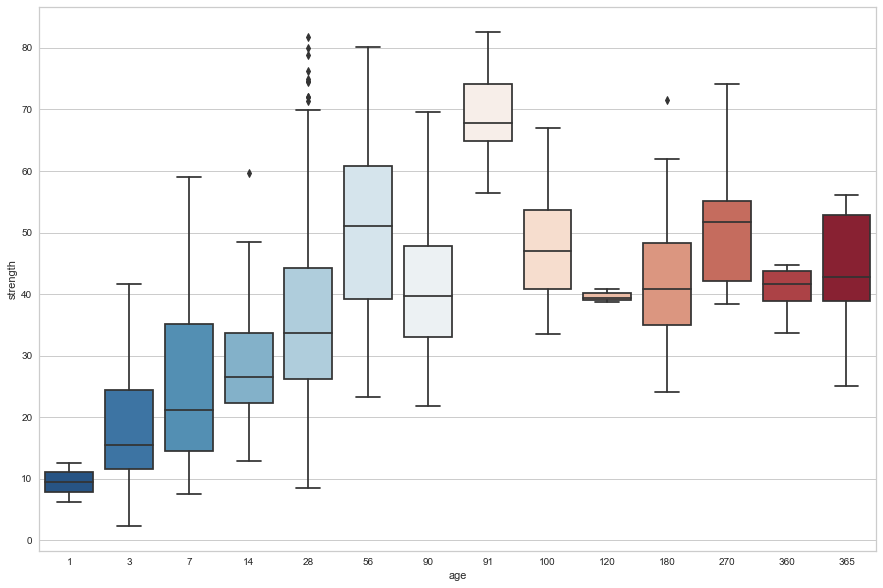

In [19]:
plt.figure(figsize=(15,10))
sns.boxplot(x="age", y="strength",
                 data=df, palette="RdBu_r")

##### Clearly from the boxplot ploted above we can see that as the age increases the strength of the concrete also increases. The maximum strength is observed at a range of 90- 150 days and slightly decreases as the days pass by.

##### Feature Engineering 

3. Feature Engineering techniques (10 marks)
a. Identify opportunities (if any) to extract a new feature from existing features, drop a feature (if required)
b. Get data model ready and do a train test split.
c. Check for higher degree attributes, should it be linear, quadratic or higher degree? Use Polynomial Features (Consider degree 2 and 3).

##### What we can observe from the above visualizations and analysis is that the strength of the cement is highly correlated to the values of cement, age and superplasticity. Perhaps taking the mean of cement and superplacticity features would give us an additional feature of importance; so lets do that. Here I am not dropping any features as all of them are relevant in some extent and it would be better not to drop any to maintain the accuracy of the results.

In [20]:
#a.
feature_df = df.loc[:, ['cement','superplastic']]
feature_df['cement_superplastic_avg_quantity'] = feature_df.mean(axis = 1)

feature_df['cement_superplastic_avg_quantity'].value_counts()


155.00    13
165.50    13
169.50    12
174.50    12
228.80    12
          ..
168.50     1
68.50      1
147.25     1
174.65     1
175.45     1
Name: cement_superplastic_avg_quantity, Length: 323, dtype: int64

In [21]:
#b.
X = df.drop(['strength'],axis=1)   #set of independent variables
y = df[['strength']]               #dependent variable
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)   #training and test set for x and y variables

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale
# data standardization with sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = ['cement','slag','ash','water','superplastic','coarseagg','fineagg','age']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

Best degree 3 with RMSE 6.288269565132408


Text(0, 0.5, 'RMSE')

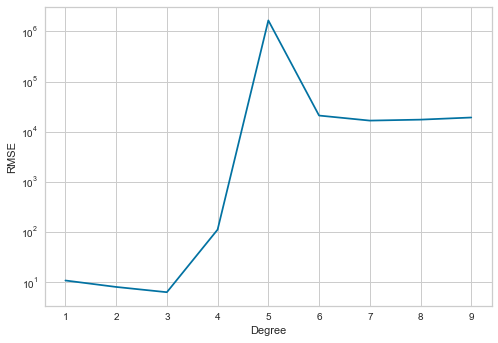

In [22]:
#c.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

rmses = []
degrees = np.arange(1, 10)
min_rmse, min_deg = 1e10, 0

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(X_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(X_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

# Plot and present results
print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')


#### Creating the model and tuning it

1. Algorithms that you think will be suitable for this project. 
Use Kfold Cross Validation to evaluate model performance. 
Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics.
(at least 3 algorithms, one bagging and one boosting based algorithms has to be there). (15 marks)

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr.score(X_train,y_train)
y_pred_rfrtr=rfr.predict(X_train)
y_pred_rfrte=rfr.predict(X_test)
score1 = r2_score(y_test,y_pred_rfrte)
print('Train R2 score: ',r2_score(y_train,y_pred_rfrtr))
print('Test R2 score: ',r2_score(y_test,y_pred_rfrte))

Train R2 score:  0.9846284355189142
Test R2 score:  0.900874315780691


In [24]:
# Cross Validation results for Random Forest Regressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(rfr,X, y, cv=kfold)
np.mean(abs(results))

0.9087667324234372

In [25]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Random Forest Regressor'], 'score': score1})
resultsDf = resultsDf[['Method', 'score']]

#tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor'], 'score': score1})
#resultsDf = pd.concat([resultsDf, tempResultsDf])
#resultsDf = resultsDf[['Method', 'score1']]
resultsDf

,Method,score
0,Random Forest Regressor,0.900874


In [26]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score
br=BaggingRegressor()
br.fit(X_train,y_train)
br.score(X_train,y_train)
y_pred_brtr=br.predict(X_train)
y_pred_brte=br.predict(X_test)
score2 = r2_score(y_test,y_pred_brte)
print('Train R2 score: ',r2_score(y_train,y_pred_brtr))
print('Test R2 score: ',r2_score(y_test,y_pred_brte))

Train R2 score:  0.9776587650079498
Test R2 score:  0.8855692782987312


In [27]:
# Cross Validation results for Bagging Regressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(br,X, y, cv=kfold)
np.mean(abs(results))

0.897458423268859

In [28]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'score': score2})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,score
0,Random Forest Regressor,0.900874
0,Bagging,0.885569


In [29]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor(random_state=0, n_estimators=100)
abr.fit(X_train, y_train)
abr.feature_importances_  
abr.fit(X_train,y_train)
abr.score(X_train,y_train)
y_pred_abrtr=abr.predict(X_train)
y_pred_abrte=abr.predict(X_test)
score3 = r2_score(y_test,y_pred_abrte)
print('Train R2 score: ',r2_score(y_train,y_pred_abrtr))
print('Test R2 score: ',r2_score(y_test,y_pred_abrte))

Train R2 score:  0.8327133539963235
Test R2 score:  0.7980298462153342


In [30]:
# Cross Validation results for AdaBoost Regressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(abr,X, y, cv=kfold)
np.mean(abs(results))

0.7738872364346125

In [31]:
tempResultsDf = pd.DataFrame({'Method':['AdaBoosting'], 'score': score3})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,score
0,Random Forest Regressor,0.900874
0,Bagging,0.885569
0,AdaBoosting,0.798030


In [32]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(X_train,y_train)
gb.score(X_train,y_train)
y_pred_gbtr=gb.predict(X_train)
y_pred_gbte=gb.predict(X_test)
score4 = r2_score(y_test,y_pred_gbte)
print('Train R2 score: ',r2_score(y_train,y_pred_gbtr))
print('Test R2 score: ',r2_score(y_test,y_pred_gbte))


Train R2 score:  0.949735450548429
Test R2 score:  0.8915768503419287


In [33]:
# Cross Validation results for Gradient Boosting Regressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(gb,X, y, cv=kfold)
np.mean(abs(results))

0.8981882075162343

In [34]:
tempResultsDf = pd.DataFrame({'Method':['GradientBoosting'], 'score': score4})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,score
0,Random Forest Regressor,0.900874
0,Bagging,0.885569
0,AdaBoosting,0.798030
0,GradientBoosting,0.891577


##### We can see that the best results is given by Random Forest Regressor followed by Gradient Boosting. Also we can see that the cross validation score for each of the regressor does not vary much from our test data meaning that our model is working fine.

#2. Techniques employed to squeeze that extra performance out of the model without making it over fit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (15 marks)

##### The random forest is overfitting but has improved the model performance. So we now tune the hyper parameters to reduce the overfit.

In [46]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
rfr_gs=grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.5min finished


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [45]:
best_grid = grid_search.best_estimator_

In [49]:
rfr=RandomForestRegressor(bootstrap = True,
                          max_depth=110,
                          max_features= 3,
                          min_samples_leaf=3,
                          min_samples_split= 8,
                          n_estimators= 200)
rfr.fit(X_train,y_train)
rfr.score(X_train,y_train)
y_pred_rfrtr=rfr.predict(X_train)
y_pred_rfrte=rfr.predict(X_test)
score5 = r2_score(y_test,y_pred_rfrte)
print('Train R2 score: ',r2_score(y_train,y_pred_rfrtr))
print('Test R2 score: ',r2_score(y_test,y_pred_rfrte))

Train R2 score:  0.9387351817020382
Test R2 score:  0.8728312055420478


In [50]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest Boosting after tuning'], 'score': score5})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,score
0,Random Forest Regressor,0.900874
0,Bagging,0.885569
0,AdaBoosting,0.798030
0,GradientBoosting,0.891577
0,Random Forest Boosting after tuning,0.872831


##### Clearly, from the training and testing scores we can see that the model is not overfit any more and gives fairly good result in the test set as well as training set. Thus the performance of our model has increased.